In [5]:
import geopandas as gpd
from shapely.ops import linemerge

In [21]:
fp1 = r"D:\Projects\Pr\2505.12\Dresden\Sections (waterkeringen)\geo_sections_4326_gtHQ10.shp"
fp2 = r"D:\Projects\Pr\2505.12\Dresden\Sections (waterkeringen)\geo_sections_4326_ltHQ10.shp"
gdf1 = gpd.read_file(fp1)
gdf2 = gpd.read_file(fp2)

In [28]:
data = [
    {'id':1, 'segmentid':1, 'name':'gtHQ10'},
    {'id':2, 'segmentid':2, 'name':'ltHQ10'}
]
index = [
    0, 
    1
]
geometry = [
    linemerge(gdf1.geometry.tolist()),
    linemerge(gdf1.geometry.tolist())
]

In [29]:
gdf_section = gpd.GeoDataFrame(data=data, index=index, crs={'init':'epsg:4326'}, geometry=geometry)

In [31]:
fp_out = r"D:\Projects\Pr\2505.12\Dresden\Sections (waterkeringen)\geo_sections_4326.shp"
gdf_section.to_file(fp_out)

In [34]:
data = [
    {'id':1, 'dikesystem':1, 'name':'segment gtHQ10'},
    {'id':2, 'dikesystem':1, 'name':'segment ltHQ10'}
]
index = [
    0, 
    1
]
geometry = [
    linemerge(gdf1.geometry.tolist()),
    linemerge(gdf1.geometry.tolist())
]

In [35]:
gdf_segment = gpd.GeoDataFrame(data=data, index=index, crs={'init':'epsg:4326'}, geometry=geometry)

In [36]:
fp_out = r"D:\Projects\Pr\2505.12\Dresden\Segments (ringdelen)\geo_segments_4326.shp"
gdf_segment.to_file(fp_out)

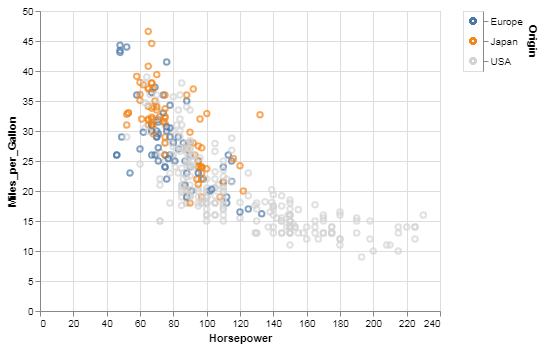

In [1]:
import altair as alt
from vega_datasets import data

cars = data.cars.url

selection = alt.selection_multi(
    fields=["Origin"], init=[{"Origin": "Europe"}, {"Origin": "Japan"}]
)
color = alt.condition(
    selection, alt.Color("Origin:N", legend=None), alt.value("lightgray")
)

scatter = (
    alt.Chart(cars)
    .mark_point()
    .encode(x="Horsepower:Q", y="Miles_per_Gallon:Q", color=color, tooltip="Name:N")
)

legend = (
    alt.Chart(cars)
    .mark_point()
    .encode(y=alt.Y("Origin:N", axis=alt.Axis(orient="right")), color=color)
    .add_selection(selection)
)

scatter | legend